In [1293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime

In [1294]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [1295]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [1296]:
df['returnb'] = df['domestic_gross'] / df['budget']
df.sort_values('budget',ascending=False).head(50)

,Unnamed: 0,movie_title,domestic_distributor,budget,domestic_opening_sales,earliest_release,rating,runtime_minutes,genres,summary_sales,...,Gal Gadot,Angelina Jolie,Jason Statham,Thomas Tull,Tommy Lee Jones,James Newton Howard,bankable_count,domestic_gross,year,returnb
1,1,Avengers: Endgame,Walt Disney Studios Motion Pictures,356000000,357115007,2019-04-24,PG-13,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[['Domestic', 858373000], ['International', 19...",...,0,0,0,0,0,0,3,858373000,2019,2.411160
7,7,Star Wars: Episode VIII,Walt Disney Studios Motion Pictures,317000000,220009584,2017-12-13,PG-13,152.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 620181382], ['International', 71...",...,0,0,0,0,0,0,0,620181382,2017,1.956408
71,72,Pirates of the Caribbean: At World's End,Walt Disney Studios Motion Pictures,300000000,114732820,2007-05-22,PG-13,169.0,"['Action', 'Adventure', 'Fantasy']","[['Domestic', 309420425], ['International', 65...",...,0,0,0,0,0,0,1,309420425,2007,1.031401
4,4,Avengers: Infinity War,Walt Disney Studios Motion Pictures,300000000,257698183,2018-04-25,PG-13,149.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 678815482], ['International', 13...",...,0,0,0,0,0,0,3,678815482,2018,2.262718
130,135,Justice League,Warner Bros.,300000000,93842239,2017-10-17,PG-13,120.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 229024295], ['International', 42...",...,1,0,0,0,0,0,2,229024295,2017,0.763414
158,165,Solo: A Star Wars Story,Walt Disney Studios Motion Pictures,275000000,84420489,2018-05-23,PG-13,135.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 213767512], ['International', 17...",...,0,0,0,0,0,0,0,213767512,2018,0.777336
11,11,Star Wars: Episode IX,Walt Disney Studios Motion Pictures,275000000,177383864,2019-12-18,PG-13,141.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 515202542], ['International', 55...",...,0,0,0,0,0,0,0,515202542,2019,1.873464
181,193,Superman Returns,Warner Bros.,270000000,52535096,2006-06-28,PG-13,154.0,"['Action', 'Sci-Fi']","[['Domestic', 200081192], ['International', 19...",...,0,0,0,0,0,0,0,200081192,2006,0.741041
179,188,Tangled,Walt Disney Studios Motion Pictures,260000000,48767052,2010-11-24,PG,100.0,"['Adventure', 'Animation', 'Comedy', 'Family',...","[['Domestic', 200821936], ['International', 39...",...,0,0,0,0,0,0,0,200821936,2010,0.772392
50,51,Spider-Man 3,Sony Pictures Entertainment (SPE),258000000,151116516,2007-05-01,PG-13,139.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 336530303], ['International', 55...",...,0,0,0,0,0,0,0,336530303,2007,1.304381


In [1297]:
df.sort_values('budget').groupby('Horror').describe()

Unnamed: 0                                                              \
            count        mean         std   min     25%    50%     75%    max   
Horror                                                                          
0           686.0  367.243440  213.328698   0.0  182.25  369.5  553.75  742.0   
1            37.0  508.216216  195.875121  59.0  360.00  549.0  685.00  739.0   

       budget                ...    year         returnb              \
        count          mean  ...     75%     max   count        mean   
Horror                       ...                                       
0       686.0  1.009933e+08  ...  2015.0  2020.0   686.0    2.533172   
1        37.0  3.871392e+07  ...  2017.0  2019.0    37.0  202.439801   

                                                                           
                std       min       25%       50%        75%          max  
Horror                                                                     
0          4.365821  0.415359  1.198442  1.775354   2.702282    93.383953  
1       1181.463239  0.706840  2.228579  5.677805  11.060257  7194.587333  

[2 rows x 664 columns]

In [1298]:
df1 = df[['budget','is_sequel','month','top50_d','year','bankable_count','runtime_minutes','domestic_gross']]

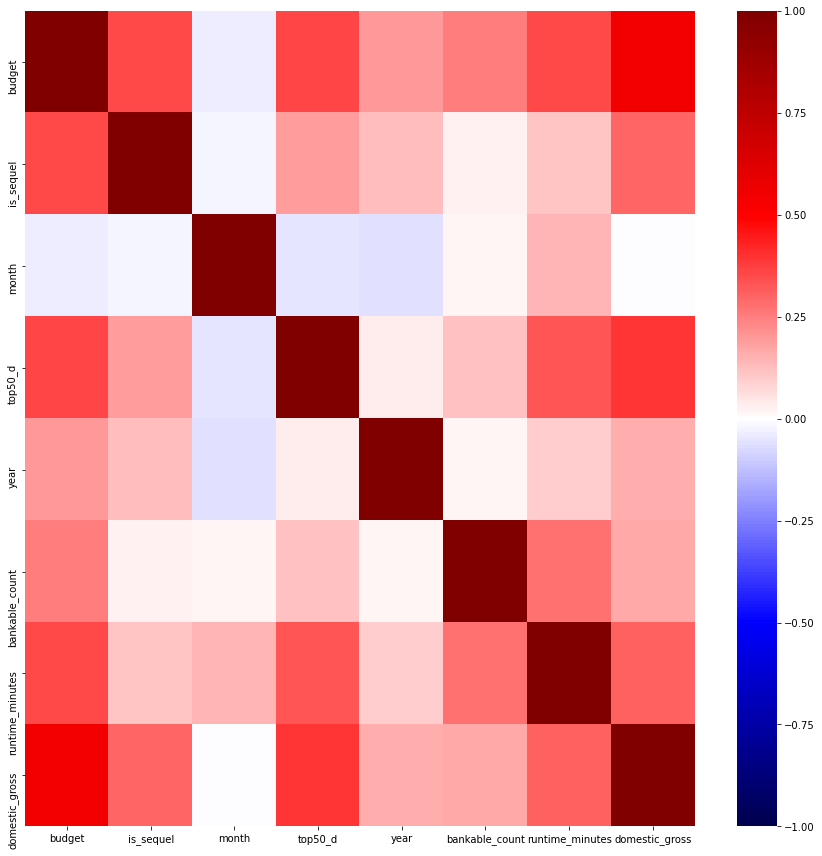

In [1299]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-1300-0640107250d6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


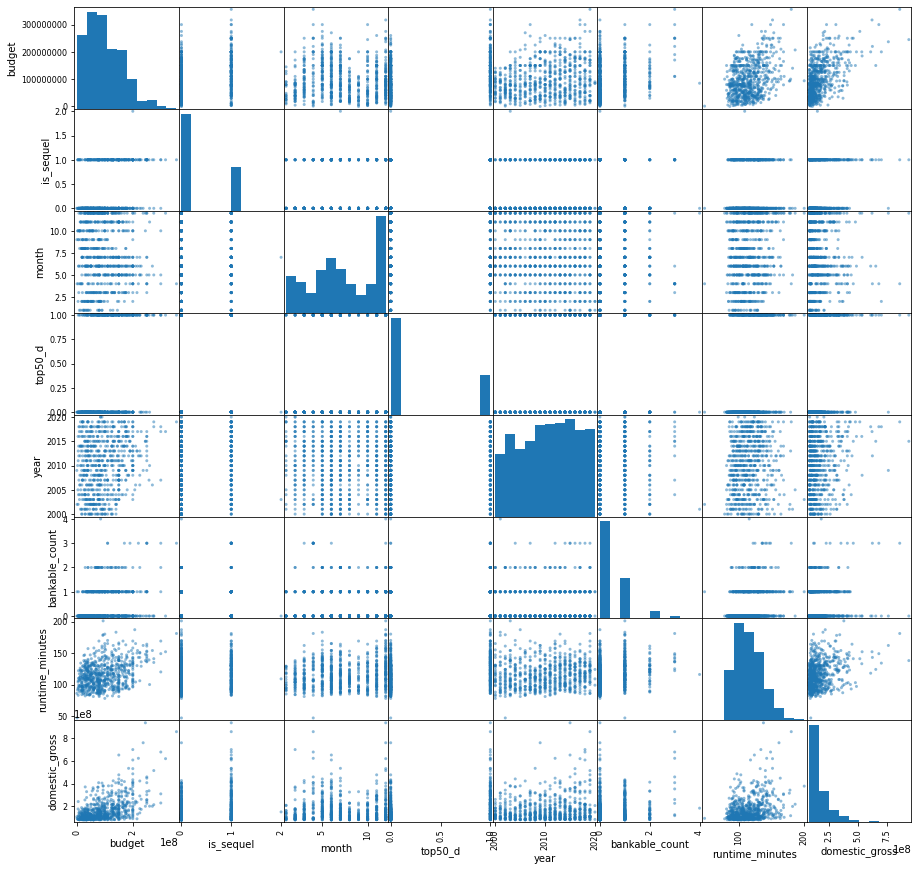

In [1300]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

Text(0.5, 1.0, 'Budget versus domestic gross top movies from 2000 to 2020')

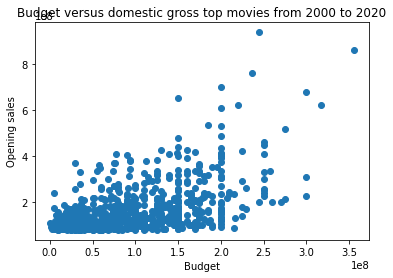

In [1301]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = df['budget']
sales_y = df['domestic_gross']

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic gross top movies from 2000 to 2020')

In [1302]:
x = df[['budget','is_sequel','rating','top50_d','year','runtime_minutes','month','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]


y = df['domestic_gross']

x_tr, x_test, y_tr, y_test = train_test_split(x, y,test_size=.2, random_state=5)

In [1303]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=.25, random_state=10)

In [1304]:
x_cont_train = x_train[['budget','is_sequel','top50_d','year','month','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]
                        
x_cont_val = x_val[['budget','is_sequel','top50_d','year','month','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]
#x_cont_test = x_test[['budget','is_sequel','year','runtime_minutes']

In [1305]:
#x_cont_train['budget10h'] = np.where((x_cont_train['Horror'] == 1), 
                                    #x_cont_train['budget']*2, x_cont_train['budget'])

#x_cont_val['budget10h'] = np.where((x_cont_val['Horror'] == 1), 
                                    #x_cont_val['budget']*2, x_cont_val['budget'])

In [1306]:
x_cont_train.sort_values('budget')

,budget,is_sequel,top50_d,year,month,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,Mystery,Romance
518,5000000,1,0,2011,10,83.0,0,0,0,0,0,1,1,0
674,5000000,1,1,2013,9,106.0,0,0,0,0,0,1,1,0
666,6500000,0,0,2014,9,99.0,0,0,0,0,0,1,1,0
464,7000000,0,0,2012,6,110.0,0,0,0,1,1,0,0,0
677,7000000,0,0,2018,3,110.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,250000000,1,1,2016,4,147.0,1,1,0,0,0,0,0,0
119,250000000,1,0,2011,5,137.0,1,1,0,0,0,0,0,0
50,258000000,1,1,2007,5,139.0,1,1,0,0,0,0,0,0
181,270000000,1,1,2006,6,154.0,1,0,0,0,0,0,0,0


In [1307]:
x_cont_train['BUD2'] = x_cont_train[['budget']]**2
x_cont_val['BUD2'] = x_cont_val[['budget']]**2
#x_cont_test['BUD2'] = x_test[['budget']]**2
x_cont_train.head()

,budget,is_sequel,top50_d,year,month,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,Mystery,Romance,BUD2
128,90000000,0,0,2000,12,143.0,0,1,0,0,1,0,0,1,8100000000000000
254,80000000,1,0,2018,6,97.0,0,1,1,1,0,0,0,0,6400000000000000
394,50000000,0,1,2011,6,112.0,1,1,0,0,0,0,1,0,2500000000000000
532,34000000,0,0,2014,9,113.0,1,0,0,0,0,0,1,0,1156000000000000
78,125000000,1,1,2010,11,146.0,0,1,0,0,0,0,1,0,15625000000000000


In [1308]:
#x_cont_train['bankable'] = x_cont_train[['bankable_count']]*10000000
#x_cont_val['bankable'] = x_cont_val[['bankable_count']]*10000000

In [1309]:
#x_cont_train['dir_act'] = x_train['top50_d'] * x_train['bankable_count']
#x_cont_val['dir_act'] = x_val['top50_d'] * x_val['bankable_count']
#x_cont_test['BUD2'] = x_test[['budget']]*1.5

In [1310]:
x_cat_train = x_train[['rating']]
x_cat_val = x_val[['rating']]
#x_cat_test = x_test[['rating']]

In [1311]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(x_cat_train)

ohe_x_train = ohe.transform(x_cat_train)

columns = ohe.get_feature_names(['rating'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=x_cat_train.index)

ohe_x_train_df.head()

,rating_PG,rating_PG-13,rating_R
128,0.0,1.0,0.0
254,1.0,0.0,0.0
394,0.0,1.0,0.0
532,0.0,1.0,0.0
78,0.0,1.0,0.0


In [1312]:
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(x_cat_val)

ohe_x_val = ohe_v.transform(x_cat_val)

columns_v = ohe_v.get_feature_names(['rating'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns_v, index=x_cat_val.index)

ohe_x_val_df.head()

,rating_PG,rating_PG-13,rating_R
96,1.0,0.0,0.0
377,0.0,1.0,0.0
137,0.0,1.0,0.0
6,0.0,1.0,0.0
18,0.0,1.0,0.0


In [1313]:
combo_train_df = pd.concat([x_cont_train, ohe_x_train_df], axis=1)

combo_val_df =  pd.concat([x_cont_val, ohe_x_val_df], axis=1)
combo_val_df.head()

,budget,is_sequel,top50_d,year,month,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,Mystery,Romance,BUD2,rating_PG,rating_PG-13,rating_R
96,60000000,0,1,2001,5,90.0,0,1,1,1,0,0,0,0,3600000000000000,1.0,0.0,0.0
377,217000000,1,1,2017,6,154.0,1,1,0,0,0,0,0,0,47089000000000000,0.0,1.0,0.0
137,90000000,1,1,2001,8,90.0,1,0,0,1,0,0,0,0,8100000000000000,0.0,1.0,0.0
6,220000000,1,1,2012,4,143.0,1,1,0,0,0,0,0,0,48400000000000000,0.0,1.0,0.0
18,160000000,0,0,2019,3,123.0,1,1,0,0,0,0,0,0,25600000000000000,0.0,1.0,0.0


In [1314]:
combo_lr = LinearRegression()

combo_lr.fit(combo_train_df, y_train)

combo_lr.score(combo_val_df, y_val) #R2

y_pred = combo_lr.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

89839278.5137412

In [1315]:
combo_lr.score(combo_val_df, y_val) #R2

0.4527179081092878

In [1316]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.24
is_sequel : 1890.73
top50_d : 1776.60
year : 405552.54
month : 1954.52
runtime_minutes : 551897.33
Action : 2863.54
Adventure : 424.14
Animation : -3270.82
Comedy : -7481.42
Drama : 6181.61
Horror : -97.48
Mystery : -449.94
Romance : -2623.51
BUD2 : 0.00
rating_PG : -4312.23
rating_PG-13 : -165.29
rating_R : 6753.32


In [1317]:
import scipy.stats as stats
x1 = df[['budget']]
y1 = df['domestic_gross']

In [1318]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x1,y)
    pred = rgr.predict(x1)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

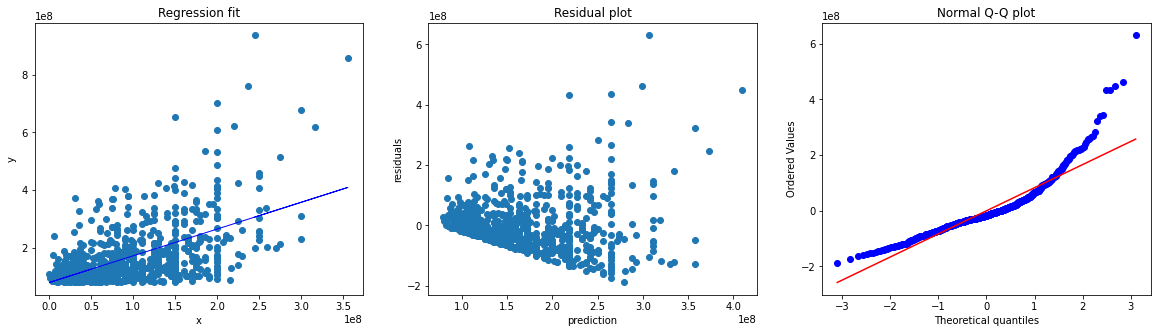

In [1319]:
diagnostic_plot(x1, y1)

In [1320]:
x2_train = combo_train_df.copy().drop('budget',axis=1)
x2_val = combo_val_df.copy().drop('budget',axis=1)

In [1321]:
x2_train

,is_sequel,top50_d,year,month,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,Mystery,Romance,BUD2,rating_PG,rating_PG-13,rating_R
128,0,0,2000,12,143.0,0,1,0,0,1,0,0,1,8100000000000000,0.0,1.0,0.0
254,1,0,2018,6,97.0,0,1,1,1,0,0,0,0,6400000000000000,1.0,0.0,0.0
394,0,1,2011,6,112.0,1,1,0,0,0,0,1,0,2500000000000000,0.0,1.0,0.0
532,0,0,2014,9,113.0,1,0,0,0,0,0,1,0,1156000000000000,0.0,1.0,0.0
78,1,1,2010,11,146.0,0,1,0,0,0,0,1,0,15625000000000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,0,2009,12,121.0,0,0,0,1,1,0,0,1,7225000000000000,0.0,0.0,1.0
500,0,0,2016,5,97.0,1,1,1,1,0,0,0,0,5329000000000000,1.0,0.0,0.0
183,0,1,2001,5,183.0,1,0,0,0,1,0,0,1,19600000000000000,0.0,1.0,0.0
572,0,0,2019,9,122.0,0,0,0,0,1,0,0,1,169000000000000,1.0,0.0,0.0


In [1322]:
combo_lrx2 = LinearRegression()

combo_lrx2.fit(x2_train, y_train)

combo_lrx2.score(x2_val, y_val) #R2

y_pred = combo_lrx2.predict(x2_val)
np.sqrt(mean_squared_error(y_val, y_pred))

88657703.45490795

In [1323]:
combo_lrx2.score(x2_val, y_val) #R2

0.4670190566984628

In [1324]:
print('Feature coefficient results: \n')
for feature, coef in zip(x2_train.columns, combo_lrx2.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

is_sequel : 1885.91
top50_d : 2371.25
year : 397769.60
month : 2331.45
runtime_minutes : 542823.85
Action : 2612.63
Adventure : 119.92
Animation : -3384.81
Comedy : -7391.51
Drama : 6171.75
Horror : -4.06
Mystery : -414.48
Romance : -2493.97
BUD2 : 0.00
rating_PG : -4404.70
rating_PG-13 : -163.34
rating_R : 6792.87


In [1325]:
x_budget_train = x_train[['budget']]
x_budget_val = x_val[['budget']]
x_budget_test = x_test[['budget']]

In [1326]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

97328915.5094579

In [1327]:
b_lr.score(x_budget_val, y_val) #R2

0.35766365683765244

In [1328]:
x_budget_train['b2'] = x_budget_train['budget']**2
x_budget_val['b2'] = x_budget_val['budget']**2

<ipython-input-1328-154c5e5295c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_train['b2'] = x_budget_train['budget']**2
<ipython-input-1328-154c5e5295c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_val['b2'] = x_budget_val['budget']**2


In [1329]:
x_budget_train.head()

,budget,b2
128,90000000,8100000000000000
254,80000000,6400000000000000
394,50000000,2500000000000000
532,34000000,1156000000000000
78,125000000,15625000000000000


In [1330]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

91263547.88702409

In [1331]:
b_lr.score(x_budget_val, y_val) #R2

0.43522765516896855

In [1332]:
print('Feature coefficient results: \n')
for feature, coef in zip(x_budget_train.columns, b_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.21
b2 : 0.00
